# Introducción a la Clasificación

El problema de clasificación se puede resumir en asignar una de $C_k$ clases discretas a un vector dado $\mathbf{x}$. En la mayoría de los casos estas clases son disjuntas, entonces el vector entrada puede asignarse solamente a una clase. 



En ese caso el Espacio de Entrada, es decir el espacio vectorial formado por todos los vectores entrada y sus combinaciones lineales, es separado en $regiones\, de\, decisión$, que pueden ser de dos tipos: lineales y no lineales.

Los conjuntos de datos que pueden ser separados o clasificados por separadores lineales se dice que son $linealmente \,separables$. Veamos un ejemplo de un dataset que no es linealmente separable.

In [5]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np

In [19]:
iris = datasets.load_iris()


In [20]:
names=[name[:-5] for name in iris['feature_names']]
iris_df = pd.DataFrame(iris['data'], columns=names)


In [21]:
iris_df.head()


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
iris_df=iris_df.join(pd.DataFrame(iris['target'], columns=['target']))
iris_df.head()


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


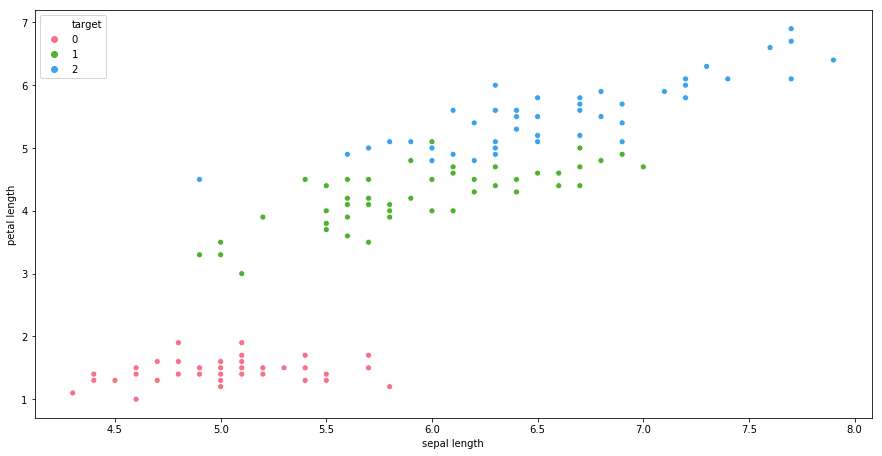

In [11]:
plt.figure(figsize=(15, 7.5))
sns.scatterplot(iris_df['sepal length'], iris_df['petal length'], hue=iris_df['target'], palette = sns.color_palette("husl", 3))

## Funciones Discriminantes. 

Una función discriminante es una que toma un vector de observaciones y retorna una de $k$ clases. El tipo más sencillo de estudiar son los discriminantes lineales. 

La forma más simple de una función discriminante es una función lineal simple de los vectores. Por ejemplo: $$Y(x) = \mathbf{wx}+w_0$$

Si el vector $y(x)\geq 0$ entonces asignamos a $x$ la clase $C_1$, de lo contrario asignamos la clase $C_2$

En este problema se puede llegar a demostrar que $w$ es perpendicular a la dirección de separación y por tanto determina la orientación del plano (linea). 

La distancia del plano (línea) de separación está dada por $$\frac{W^T x}{||W||} = - \frac{w_0}{||W||}$$

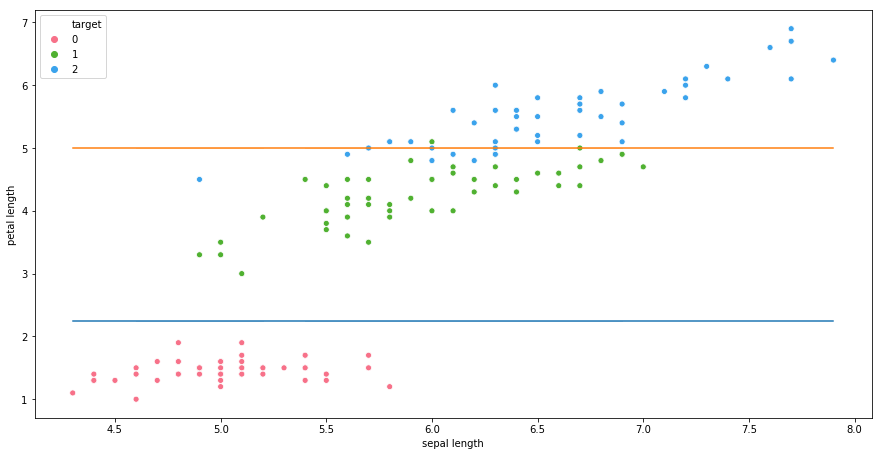

In [203]:
y=np.ones(150)

plt.figure(figsize=(15, 7.5))
sns.scatterplot(iris_df['sepal length'], iris_df['petal length'], hue=iris_df['target'], palette = sns.color_palette("husl", 3))
sns.lineplot(iris_df['sepal length'], y*2.25)
sns.lineplot(iris_df['sepal length'], y*5)



# Clasificación Binaria

En los problemas de regresión lineal el vector a predecir era un vector de valores reales. Para clasificación tenemos que encontrar otra forma de representar los vectores. Para una clasificación con dos clases podemos usar el vector $\mathbf{t}$ donde las entradas son tales que $t_i \in \{0,1 \}$. En esta clase vamos a desarrollar un ejemplo de clasificación binaria. 

## Regresión Logística

Vamos a usar el modelo de regresión logística para dar un resultado preliminar al problema de clasificación binaria. 

Un modelo de regresión logística es 

$$y = sigmoide(w X + w_0) $$

donde la función sigmoide es $$sigmoide(z)=\frac{1}{1+e^{-z}}$$


En general modelos de la forma:  $𝑦=f(𝑤𝑋+𝑤0)$ son llamados modelos lineales generalizados puesto que siguen siendo lineales en las variables independientes, aunque la transformación $f( \cdot )$ no sea lineal. En el caso específico de la regresión logistica la función no linea f es la función sigmoide. 

In [225]:
#Cargamos el dataset
train = pd.read_csv('train.csv')

In [205]:
# Exploracion inicial de los datos con head
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


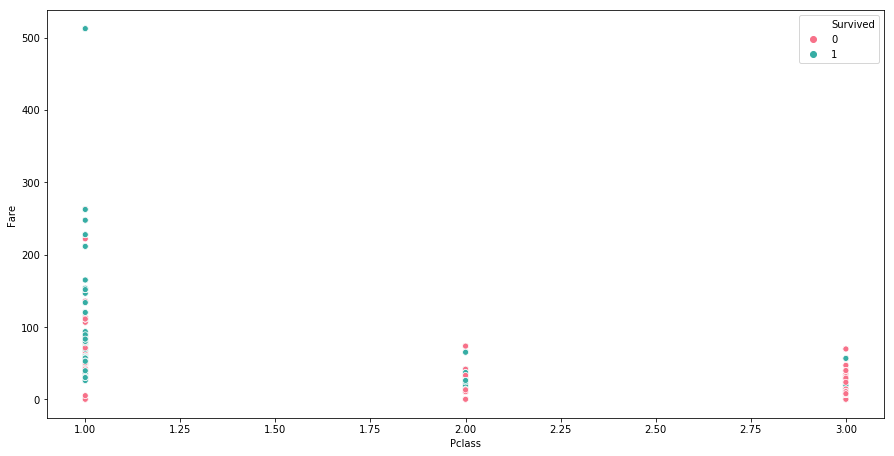

In [206]:
plt.figure(figsize=(15, 7.5))
sns.scatterplot(train['Pclass'], train['Fare'], hue=train['Survived'], palette = sns.color_palette("husl", 2))


In [162]:
# Exploración inicial de los datos para prueba.
test.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


Vamos a dejar de incluir columnas como PassengerId o Name que son únicas por cada observación

In [226]:
train = train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)


In [212]:
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [208]:
train.isna().sum()
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [227]:
# Rellenar los nulos en la columna edad
train.Age = train['Age'].fillna(train.Age.mean())

In [167]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [228]:
train.Embarked = train['Embarked'].fillna('S')

In [169]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [215]:
# Obtenemos las variables categoricas
train.columns[train.dtypes=='object']

Index(['Sex', 'Embarked'], dtype='object')

In [229]:
#Creamos una codificación en la que para cada variable categorica creamos tantas variables como categorias, 
#en la que la columna de la categoría tiene un 1 y las demás tienen un 0.

train = pd.concat([train, pd.get_dummies(train.Sex)], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [230]:
train = train.drop(['Sex'], axis=1)

In [231]:
train = pd.concat([train, pd.get_dummies(train.Embarked)], axis=1)
train = train.drop(['Embarked'], axis=1)

In [233]:
train.head()
#train = train.drop(['female', 'male'], axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [235]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [236]:
# Partimos el set de entrenamiento para comprobar que nuestro modelo está haciendo bien las cosas.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [246]:
# Cargamos la función para entrenar una regresión logística en el 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
fted_model = model.fit(X_train, y_train)

print("El intercepto es: "+str(fted_model.intercept_[0]) )
print("Los coeficientes son: ")
print(fted_model.coef_.reshape(-1,1))

El intercepto es: 1.4975207955525958
Los coeficientes son: 
[[-0.89550177]
 [-0.02913262]
 [-0.22309477]
 [-0.17450823]
 [ 0.0038883 ]
 [ 2.10779808]
 [-0.61027729]
 [ 0.82026182]
 [ 0.34328135]
 [ 0.33397762]]


In [238]:
model.score(X_test, y_test)

0.7761194029850746

In [239]:
fted_model = model.predict(X_test)
pd.Series(fted_model)

0      1
1      0
2      0
3      0
4      1
      ..
263    0
264    1
265    1
266    0
267    0
Length: 268, dtype: int64

In [243]:
sum(fted_model == y_test)/len(y_test)

from sklearn.metrics import classification_report

## ¿Cómo predecimos en ambientes productivos productivos?

In [244]:
test = pd.read_csv('test.csv')

test = test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

test.Age = test['Age'].fillna(test.Age.mean())
test.Fare = test['Fare'].fillna(test.Fare.mean())
test.Embarked = test['Embarked'].fillna('S')

test = pd.concat([test,  pd.get_dummies(test.Sex), pd.get_dummies(test.Embarked)], axis=1)
test = test.drop(['Embarked', 'Sex'], axis=1)

test.head()


,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [248]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636,0.636364,0.244019,0.110048,0.645933
std,0.841838,12.634534,0.896760,0.981429,55.840500,0.481622,0.481622,0.430019,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [247]:
pd.DataFrame(fted_model.predict(test).reshape(-1,1)).sum()


0    154
dtype: int64